In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [40]:

genres_ratings_df = pd.read_csv('../data/full_df.csv', index_col='Unnamed: 0')
genres_gross_df = pd.read_csv('../data/full_gross.csv', index_col='Unnamed: 0')

In [41]:
display(genres_gross_df.head())
display(genres_ratings_df.head())

,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Documentary,Sci-Fi,Action,Thriller,Music,Animation,year,dom_gross,for_gross,world_gross
0,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,2014,18800000.0,42400000.0,61200000.0
1,5.1,8296,Baggage Claim,Comedy,False,False,False,False,False,False,...,False,False,False,False,False,False,2013,21600000.0,887000.0,22487000.0
3,7.6,326657,Moneyball,"Biography,Drama,Sport",True,False,False,False,True,True,...,False,False,False,False,False,False,2011,75600000.0,34600000.0,110200000.0
4,6.5,87288,Hereafter,"Drama,Fantasy,Romance",False,True,False,False,False,True,...,False,False,False,False,False,False,2010,32700000.0,72500000.0,105200000.0
5,7.4,428142,Mission: Impossible - Ghost Protocol,"Action,Adventure,Thriller",False,False,False,False,False,False,...,False,False,True,True,False,False,2011,209400000.0,485300000.0,694700000.0


,averagerating,numvotes,title,genres,Sport,Fantasy,Mystery,War,Biography,Drama,...,Horror,Family,Adventure,Romance,Documentary,Sci-Fi,Action,Thriller,Music,Animation
0,8.3,31,Laiye Je Yaarian,Romance,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,8.9,559,Borderless,Documentary,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,6.4,20,Just Inès,Drama,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,4.2,50352,The Legend of Hercules,"Action,Adventure,Fantasy",False,True,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,6.5,21,Até Onde?,"Mystery,Thriller",False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [42]:
def genre_descriptive_stats(df, key_col, a, b): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[a:b] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    
    mean = np.round_(mean)
    median = np.round_(median)
    std = np.round_(std)
    
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [43]:
genres_vs_numvotes_df = genre_descriptive_stats(genres_ratings_df, 'numvotes', 4, 23)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

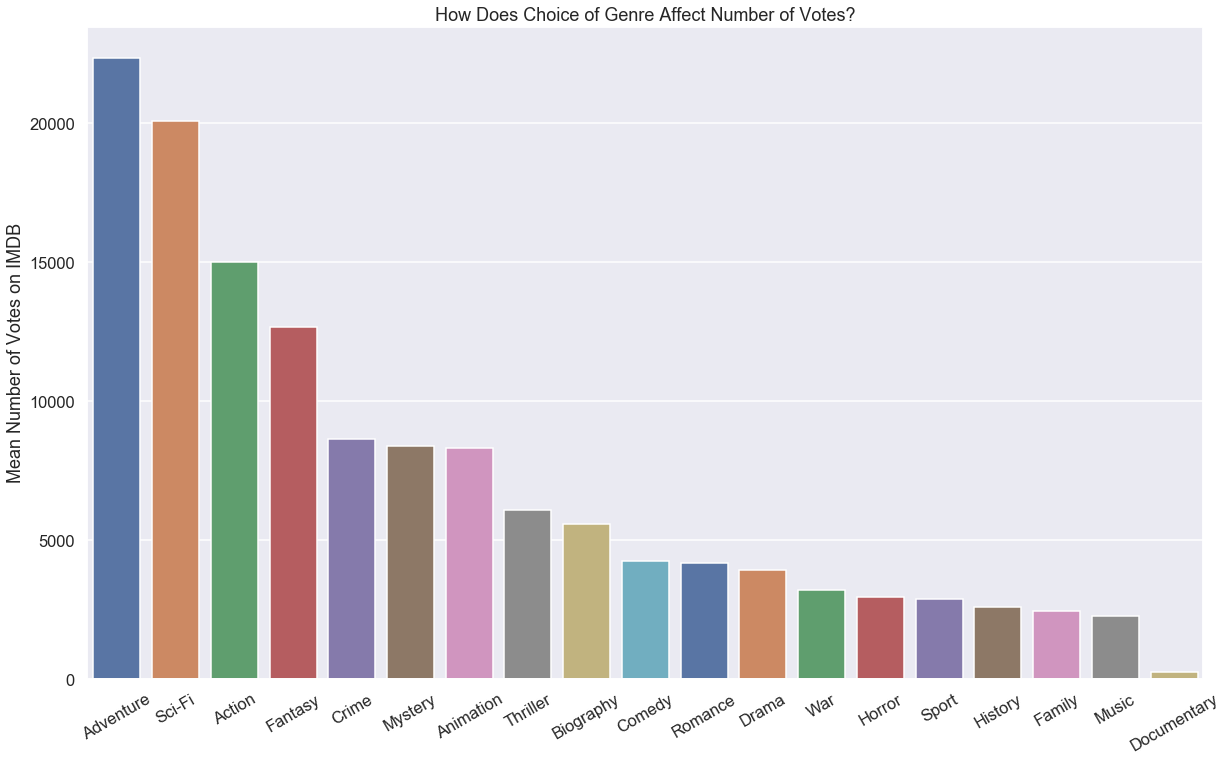

In [44]:
#plotting mean numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
numvotes_mean_series_sorted = genres_vs_numvotes_df['mean'].sort_values(ascending=False)
sns.barplot(x=numvotes_mean_series_sorted.index, y=numvotes_mean_series_sorted, ax=ax, palette='deep')
sns.set_context("talk") #rc={"axes.labelsize":36}

plt.title("How Does Choice of Genre Affect Number of Votes?")
plt.ylabel("Mean Number of Votes on IMDB")
plt.xticks(rotation=30)

Text(0, 0.5, 'Mean Number of Votes on IMDB')

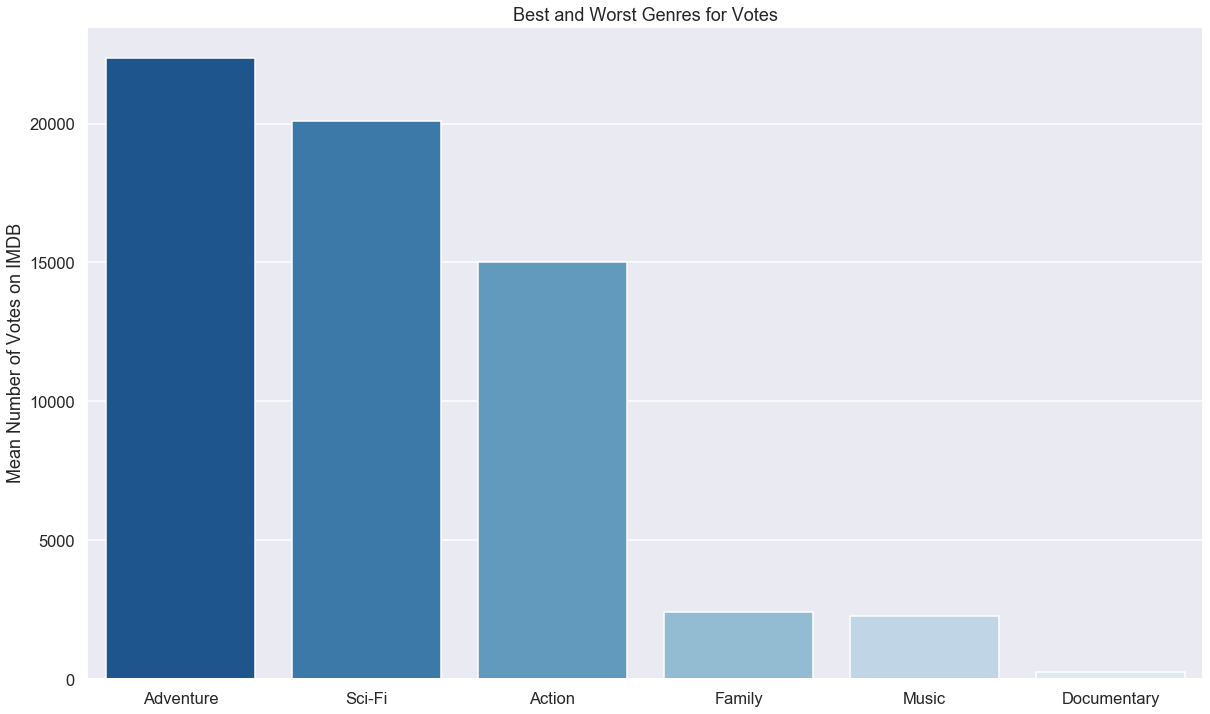

In [45]:
#plotting top 3 and bottom 3 numvotes
barplot_dims = (20, 12)
fig, ax = plt.subplots(figsize = barplot_dims)
numvotes_mean_series_top_bottom = pd.concat([numvotes_mean_series_sorted.head(3), numvotes_mean_series_sorted.tail(3)])
sns.barplot(x=numvotes_mean_series_top_bottom.index, y=numvotes_mean_series_top_bottom, ax=ax, palette=sns.color_palette("Blues_r"))

plt.title("Best and Worst Genres for Votes")
plt.ylabel("Mean Number of Votes on IMDB")
#plt.xlabel("Mean Number of Votes on IMDB")

In [46]:
low_votes = df[(df['numvotes'] > 250000) | (df['numvotes'] < 1000)].index
df2 = df.drop(low_votes)

Text(0.5, 0, 'Movie Average IMDB Rating')

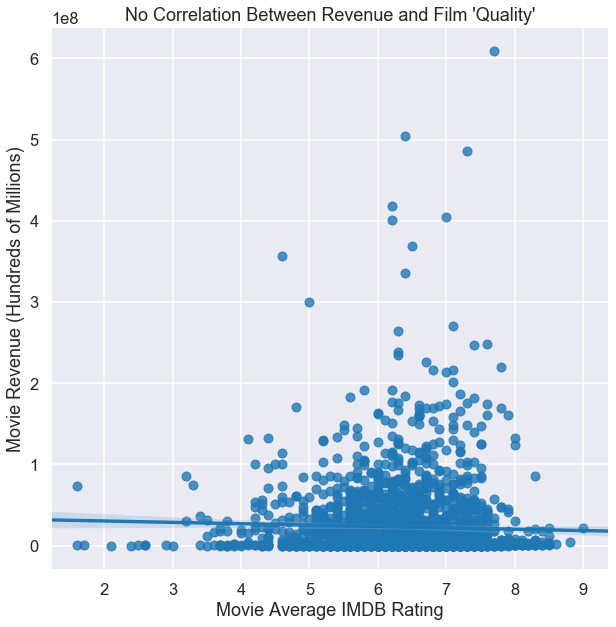

In [47]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x=df2["averagerating"], y=df2["dom_gross"], fit_reg=True)

plt.title("No Correlation Between Revenue and Film 'Quality'")
plt.ylabel("Movie Revenue (Hundreds of Millions)")
plt.xlabel("Movie Average IMDB Rating")

Text(0.5, 0, 'Mean Number of Votes on IMDB')

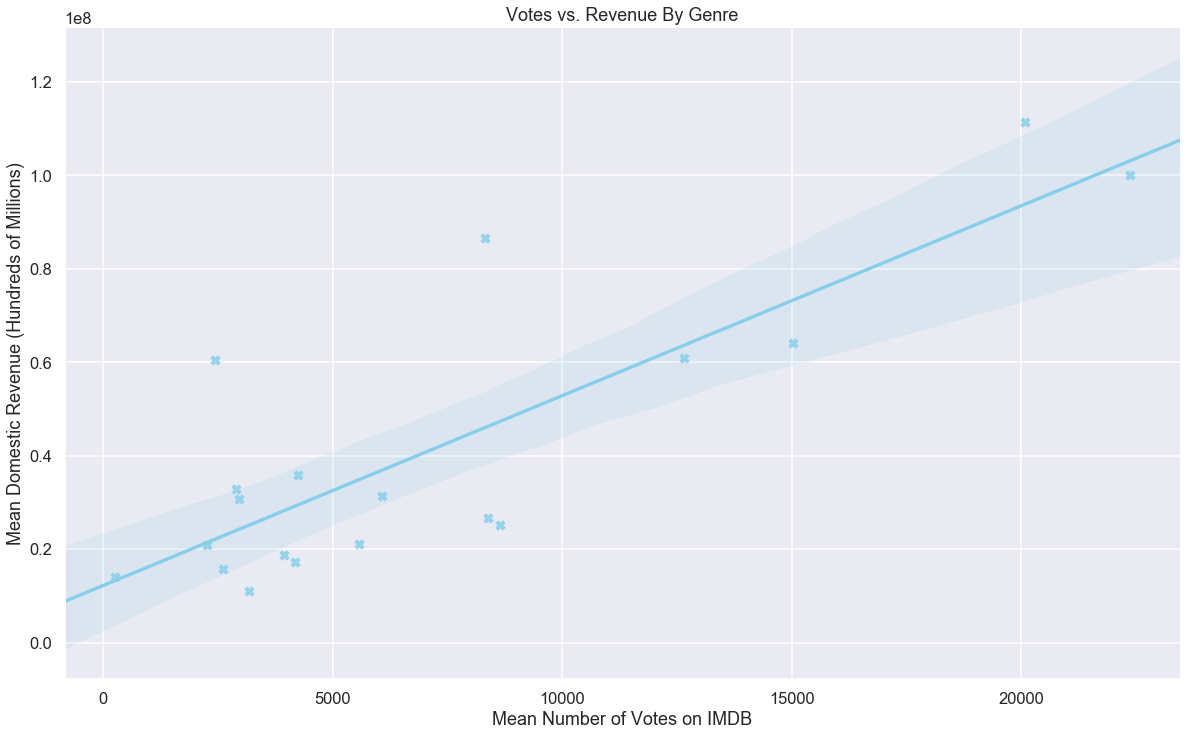

In [48]:
#ax = sns.regplot(x=genres_vs_numvotes_df['mean'], y=genres_vs_gross_df['mean'])

plot_dims = (20, 12)
fig, ax = plt.subplots(figsize = plot_dims)

regplot_df = pd.DataFrame({
'x': genres_vs_numvotes_df['mean'],
'y': genres_vs_gross_df['mean'],
'group': genres_vs_gross_df.index
})
 
sns.regplot(data=regplot_df, x="x", y="y", fit_reg=True, marker="X", color="skyblue", ax=ax)

plt.title("Votes vs. Revenue By Genre")
plt.ylabel("Mean Domestic Revenue (Hundreds of Millions)")
plt.xlabel("Mean Number of Votes on IMDB")

In [49]:
def genre_descriptive_stats(df, key_col): #key_column will be what we want to run descriptive stats on
    mean = np.ndarray(0)
    median = np.ndarray(0)
    std = np.ndarray(0)

    df_columns_to_use = df.columns[4:-5] #change this as needed

    for i, genre in enumerate(df_columns_to_use):
        mean = np.append(mean, df[key_col].loc[df[genre]].mean())
        median = np.append(median, df[key_col].loc[df[genre]].median())
        std = np.append(std, df[key_col].loc[df[genre]].std())
    d1 = np.append([mean], [median], axis=0)
    d2 = np.append(d1, [std], axis=0)
    d3 = np.transpose(d2)
    descr_stats_df = pd.DataFrame(data=d3, columns=['mean', 'median', 'standard_deviation'], index=list(df_columns_to_use))
    return descr_stats_df

In [50]:
dom_gross_stats = genre_descriptive_stats(genres_gross_df, 'dom_gross')

In [51]:
bottom_5_std_dom_gross = dom_gross_stats.sort_values('standard_deviation', ascending=True)
bottom_5_std_dom_gross = bottom_5_std_dom_gross.iloc[:5]
bottom_5_std_dom_gross

,mean,median,standard_deviation
War,1.114884e+07,726500.0,2.560064e+07
Documentary,1.400771e+07,613500.0,3.332762e+07
History,1.568500e+07,1150000.0,3.652819e+07
Romance,1.721781e+07,1300000.0,3.811735e+07
Drama,1.879528e+07,1500000.0,4.036670e+07


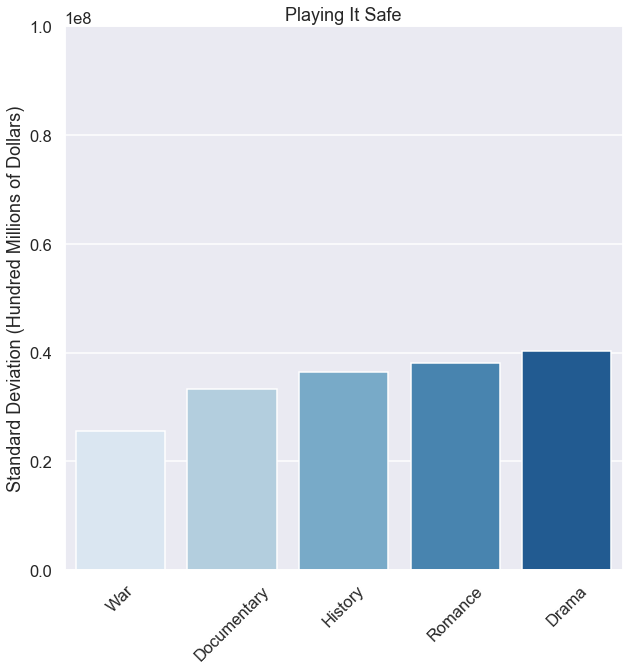

In [52]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(x=bottom_5_std_dom_gross.index, y=bottom_5_std_dom_gross["standard_deviation"], palette='Blues')
plt.ylim(0, 100000000.00)
plt.ylabel('Standard Deviation (Hundred Millions of Dollars)')
plt.title('Playing It Safe')
plt.xticks(rotation=45)
sns.set_context(rc={"axes.labelsize":15})

In [53]:
df_dom_gross_asc = genres_gross_df.sort_values('dom_gross', ascending=False)
table_top_10_dom = df_dom_gross_asc.iloc[:10]
table_top_10_dom
pd.DataFrame(table_top_10_dom, columns=('title','genres','dom_gross'))

,title,genres,dom_gross
144,Avatar,Horror,760507625.0
462,Black Panther,"Action,Adventure,Sci-Fi",700100000.0
2926,Avengers: Infinity War,"Action,Adventure,Sci-Fi",678800000.0
1360,Titanic,Adventure,659363944.0
373,Jurassic World,"Action,Adventure,Sci-Fi",652300000.0
1939,The Avengers,"Action,Adventure,Sci-Fi",623279547.0
307,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",620200000.0
1967,Incredibles 2,"Action,Adventure,Animation",608600000.0
2772,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",532200000.0
1872,Beauty and the Beast,"Drama,Fantasy,Romance",504014165.0


In [35]:
genres_vs_gross_df = genre_descriptive_stats(genres_gross_df, 'dom_gross', 4, 23)
genres_vs_gross_df

,mean,median,standard_deviation
Sport,32817524.0,12100000.0,63853805.0
Fantasy,60982935.0,22500000.0,98657563.0
Mystery,26756124.0,6700000.0,42883730.0
War,11148843.0,726500.0,25600636.0
Biography,21146477.0,3000000.0,41743774.0
Drama,18795284.0,1500000.0,40366701.0
Comedy,35900207.0,5700000.0,62819519.0
History,15684998.0,1150000.0,36528190.0
Crime,25196187.0,5550000.0,45461570.0
Horror,30679882.0,17199967.0,61328824.0
